# Dynamic Programming  based  Graph Algorithms

These class of algorithms takes a Graph as input, using it's adjacancy matrix , generates other matrix. Some examples are
    
- Transitive clousure of graph 
- All pair shortest path problem

## Standard `import` statement

In [2]:
from OpenAnalysis.matrix_animator import MatrixAnimator
import numpy as np

## Implementation Notes

- The algorithm should be implemented as a method
- The algorithm works on a `networkx` graph
- Obtain the adjacancy matrix as follws
    
```python
    def algorithm_name(G):
        import networkx as nx
        M = nx.to_numpy_matrix(G)
        # do other work now
```
- If Graph is weighted, matrix elements are weights. Default weight for an edge is 1. If an edge doesn't exsist, its weight will be treated as 0. When working with weighted graphs, You have to **MANUALLY** set those weigthts to infinity. 

```python
        m, n = M.shape
        for i in range(0, n):
            for j in range(0, n):
                if i != j and D[i, j] == 0:
                   M[i, j] = float('inf')
```

- After each change in matrix, yield matrix, `yield` copy of current version of matrix, along with a tuple containing current 3 co-ordinates at which change is caused

```python
     yield np.array(D), (i, j, k)
```

## Example Warshall- Floyd  Algorithm

Warshal-Floyd Algorithm computes All Pair Shortest Paths of a Graph using its adjacancy matrix
 

Now, Let's implement the algorithm

In [7]:
def Floyd_Warshall(G):                # Must have signature like this
    D = nx.to_numpy_matrix(G)         # Obtaining Adj. matrix
    m, n = D.shape
    for i in range(0, n):             # Making non-diagonal zeros to infinity, as it is a Weighted Graph
        for j in range(0, n):
            if i != j and D[i, j] == 0:
                D[i, j] = float('inf')
    yield np.array(D), (0, 0, 0)      # Starting yield
    count = 0
    for k in range(0, n):
        for i in range(0, n):
            for j in range(0, n):
                if D[i, j] > D[i, k] + D[k, j]:
                    yield np.array(D), (i, j, k)  # yield as array changes
                    D[i, j] = D[i, k] + D[k, j]
                count += 1
    yield np.array(D), (0, 0, 0)

## Visualizing the Algorithm - `MatrixAnimator` class

- `__init__(self, fn, G):` 
    - `fn` : A function yielding matrix along with 3-tuple
    - `G`  : Graph on which `fn` has to be applied and visualized

- `animate(self, save=False):`
    - `save` is `True` implies animation is saved in `output/` folder

- `apply_to_graph(self, show_graph=True):`
    - applies `self.fn` to `self.G` and displays the result
    - `show_graph` is `True` implies Graph is shown along with adjacancy matrix and final matrix

Here we shall create a matrix from `numpy` array, and assign random weights to its edges. Then we apply our function to graph

[[  0.   7.  inf  inf  10.  inf]
 [  7.   0.   2.  inf   7.  inf]
 [ inf   2.   0.   8.  inf  inf]
 [ inf  inf   8.   0.  10.   9.]
 [ 10.   7.  inf  10.   0.  inf]
 [ inf  inf  inf   9.  inf   0.]] [[  0.   7.   9.  17.  10.  26.]
 [  7.   0.   2.  10.   7.  19.]
 [  9.   2.   0.   8.   9.  17.]
 [ 17.  10.   8.   0.  10.   9.]
 [ 10.   7.   9.  10.   0.  19.]
 [ 26.  19.  17.   9.  19.   0.]]


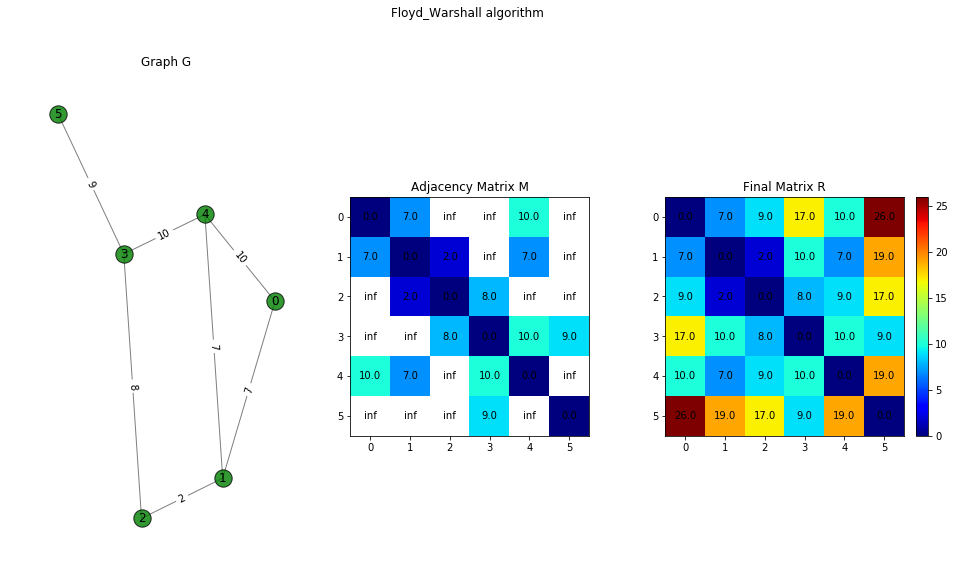

In [8]:
import networkx as nx
M = nx.from_numpy_matrix(
    np.matrix(
        [[0, 1, 0, 0, 1, 0],
         [1, 0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0, 0],
         [0, 0, 1, 0, 1, 1],
         [1, 1, 0, 1, 0, 0],
         [0, 0, 0, 1, 0, 0]]
    ))
import random
for u, v in M.edges():
    M.edge[u][v]['weight'] = random.randint(1, 10)
animator = MatrixAnimator(Floyd_Warshall, M)
animator.apply_to_graph()

After executing

    animator.animate(save=True)

go to `output/` directory to see the mp4 files

## Example File

You can see more examples at [Github](https://github.com/OpenWeavers/OpenAlgorithm/blob/master/Python/AnalysisTest/tree_growth.py)